## import os 

In [113]:
import os
os.listdir('./data')

['dataset_for_cnn_model',
 'PA_201605-2012001更新R6(20190509).xlsx',
 'tag盤點表.xlsx',
 'train.csv',
 'train_FeatureSelected.csv',
 'train_spec_checked_and_add_target(full).csv']

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
import torch
from tqdm import tqdm_notebook as tqdm
import joblib

# load

In [115]:
df = pd.read_csv('./data/train_spec_checked_and_add_target(full).csv',index_col = 0,parse_dates = True)
print(df.shape)
df.head()

(193824, 85)


,MLPAP_PI-0658.PV,MLPAP_TI-0716A22,MLPAP_TI-0706B13,MLPAP_TI-0716A03,MLPAP_TI-0706B01,MLPAP_TI-0715B1.PV,MLPAP_PIC-0761.PV,MLPAP_V125-PHD,MLPAP_TI-0706B02,MLPAP_TI-0716A16,...,MLPAP_TI-0720B1.PV,MLPAP_TI-0716A05,MLPAP_TI-0706B24,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_LIC-0738.PV,MLPAP_TI-0706B16,MLPAP_LRC-0729.PV,over_range_count,target
2016-05-09 00:00:00,-1.000000,401.0,401.0,400.100219,402.349811,399.684741,46.900002,0.051,400.0,401.253627,...,401.865110,400.0,402.0,401.148767,401.0,5.235951,402.050208,0.0,20,NaN
2016-05-09 00:10:00,-1.000000,401.0,401.0,400.050129,402.000000,399.625166,46.900002,0.051,400.0,401.361592,...,401.954911,400.0,402.0,401.000000,401.0,5.208001,402.000000,0.0,20,NaN
2016-05-09 00:20:00,-0.898558,401.0,401.0,400.149919,402.350189,399.670499,46.930040,0.051,400.0,401.899611,...,401.922669,400.0,402.0,401.000000,401.0,5.246516,402.000000,0.0,20,NaN
2016-05-09 00:30:00,-0.509010,401.0,401.0,400.099776,402.400044,399.697396,46.900002,0.051,400.0,401.849886,...,401.927230,400.0,402.0,401.000000,401.0,5.385347,402.000000,0.0,20,NaN
2016-05-09 00:40:00,-0.992771,401.0,401.0,400.199982,402.101425,399.775506,46.900002,0.051,400.0,401.599924,...,401.900039,400.0,402.0,401.000000,401.0,5.306820,402.000000,0.0,20,NaN


In [116]:
df['over_range_count'].describe()

count    193824.000000
mean         20.107195
std          31.648726
min           0.000000
25%           1.000000
50%           4.000000
75%           8.000000
max          82.000000
Name: over_range_count, dtype: float64

(array([1.46058e+05, 3.16800e+03, 1.45700e+03, 1.09000e+02, 3.70000e+01,
        2.40000e+01, 1.80000e+01, 3.60000e+01, 5.70000e+01, 4.28600e+04]),
 array([ 0. ,  8.2, 16.4, 24.6, 32.8, 41. , 49.2, 57.4, 65.6, 73.8, 82. ]),
 <a list of 10 Patch objects>)

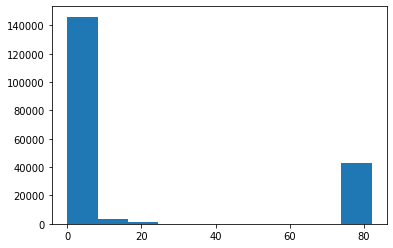

In [117]:
plt.hist(df['over_range_count'])

In [118]:
threshold = df['over_range_count'].median() + 1.5*df['over_range_count'].std()
threshold

51.47308852004386

# scale data

In [119]:
from sklearn.preprocessing import MinMaxScaler

x_col = df.drop(['target','over_range_count'],axis=1).columns.tolist()
y_col = 'target'

mm = MinMaxScaler()
df[x_col] = mm.fit_transform(df[x_col])

print(df.shape)
df.head()

(193824, 85)


,MLPAP_PI-0658.PV,MLPAP_TI-0716A22,MLPAP_TI-0706B13,MLPAP_TI-0716A03,MLPAP_TI-0706B01,MLPAP_TI-0715B1.PV,MLPAP_PIC-0761.PV,MLPAP_V125-PHD,MLPAP_TI-0706B02,MLPAP_TI-0716A16,...,MLPAP_TI-0720B1.PV,MLPAP_TI-0716A05,MLPAP_TI-0706B24,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_LIC-0738.PV,MLPAP_TI-0706B16,MLPAP_LRC-0729.PV,over_range_count,target
2016-05-09 00:00:00,0.260688,0.985042,0.987875,0.945361,0.989588,0.966670,0.939025,0.137097,0.932069,0.981626,...,0.979068,0.93927,0.984414,0.921227,0.929752,0.050863,0.985741,0.0,20,NaN
2016-05-09 00:10:00,0.260688,0.985042,0.987875,0.945253,0.988825,0.966515,0.939025,0.137097,0.932069,0.981916,...,0.979286,0.93927,0.984414,0.920856,0.929752,0.050591,0.985606,0.0,20,NaN
2016-05-09 00:20:00,0.260829,0.985042,0.987875,0.945468,0.989589,0.966633,0.939626,0.137097,0.932069,0.983362,...,0.979208,0.93927,0.984414,0.920856,0.929752,0.050965,0.985606,0.0,20,NaN
2016-05-09 00:30:00,0.261372,0.985042,0.987875,0.945360,0.989697,0.966703,0.939025,0.137097,0.932069,0.983228,...,0.979219,0.93927,0.984414,0.920856,0.929752,0.052314,0.985606,0.0,20,NaN
2016-05-09 00:40:00,0.260698,0.985042,0.987875,0.945577,0.989046,0.966907,0.939025,0.137097,0.932069,0.982557,...,0.979153,0.93927,0.984414,0.920856,0.929752,0.051551,0.985606,0.0,20,NaN


# stack time_step

In [120]:
def train_windows(df, ref_day):
    X_train, Y_train, i_lst = [], [], []
    for i in tqdm(range(len(df)-ref_day)):
        start,end = i,i+ref_day
        C1 = (df.iloc[start:end+1]['target'].isnull().sum() == 0) # 時間段內所有y都正常
        C2 = (df.iloc[start:end+1]['over_range_count'].mean() <= threshold) # 時間段內X平均來看並不超過閥值
        if C1&C2: 
            X_train.append(df.iloc[start:end+1][x_col].values) #X是一個 2Darray
            Y_train.append(df.iloc[end][y_col]) # target是一個 標量
            i_lst.append(df.iloc[[end]].index[0]) #target對應的 時間
    # 重整格式
    X_train = np.array(X_train) #一個3Darray
    Y_train = pd.Series(Y_train,index=i_lst,name='y') #一個時間序列
    return X_train, Y_train, i_lst

In [121]:
X, y ,i_lst = train_windows(df,ref_day=5)
print(X.shape,y.shape,len(i_lst))


(130922, 6, 83) (130922,) 130922


# save X and y

In [122]:
dataset = {}
dataset['X'] = X
dataset['y'] = y
dataset['index'] = i_lst

joblib.dump(dataset,'./data/dataset_for_cnn_model')

['./data/dataset_for_cnn_model']